In [13]:
%matplotlib inline
import csv
import numpy as np
import seaborn as sns; sns.set()
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.pyplot as plt

In [14]:
def remove_outliers(data, pp1, pp2):
    '''
    Based on "Data Outlier Detection using the Chebyshev Theorem",
    Brett G. Amidan, Thomas A. Ferryman, and Scott K. Cooley
    Keyword arguments:
        data -- A numpy array of discrete or continuous data
        pp1 -- likelihood of expected outliers (e.g. 0.1, 0.05 , 0.01)
        pp2 -- final likelihood of real outliers (e.g. 0.01, 0.001 , 0.0001)
    '''

    mu1 = np.mean(data)
    sigma1 = np.std(data)
    k = 1./ np.sqrt(pp1)
    odv1u = mu1 + k * sigma1
    odv1l = mu1 - k * sigma1
    new_data = data[np.where(data <= odv1u)[0]]
    new_data = new_data[np.where(new_data >= odv1l)[0]]
    mu2 = np.mean(new_data)
    sigma2 = np.std(new_data)
    k = 1./ np.sqrt(pp2)
    odv2u = mu2 + k * sigma2
    odv2l = mu2 - k * sigma2
    final_data = new_data[np.where(new_data <= odv2u)[0]]
    final_data = new_data[np.where(final_data >= odv2l)[0]]
    return final_data

In [15]:
#obtain the loaded data as arrays

def load_data(csv_sheet):
    x = list()
    y = list()
    o = list()
    with open(csv_sheet, 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            o.append(float(row[2]))
        
    x = np.array(x)
    y = np.array(y)
    o = np.array(o)
    return x,y,o

In [49]:
#plot the distribution after outlier removal
def plot_xyo(x_, y_, o_):
    sns.distplot(x_, hist=False, rug=True, kde_kws={"shade": True})
    plt.xlabel('range of poses in X (cm)')
    plt.show()
    sns.distplot(y_, hist=False, rug =True, kde_kws={"shade": True})
    plt.xlabel('range of poses in Y (cm)')
    plt.show()
    sns.distplot(o_, hist=False, rug=True, kde_kws={"shade": True})
    plt.xlabel('range of the orientation in radians')
    plt.show()

In [50]:
#obtain data from the csv for the object of medium mass
csv_sheet_str = 'midle_straight - Sheet1.csv'
csv_sheet_left = 'midle_straight - left.csv'
csv_sheet_right = 'midle_straight - right.csv'

#load the data as an array
x_m_str, y_m_str, o_m_str = load_data(csv_sheet_str)
x_m_left, y_m_left, o_m_left = load_data(csv_sheet_left)
x_m_right, y_m_right, o_m_right = load_data(csv_sheet_right)


#obtain data from the csv for the object of large mass
csv_sheet_str_l = 'large motion - Sheet1.csv'
csv_sheet_left_l = 'large motion - Sheet2.csv'
csv_sheet_right_l =  'large motion - Sheet3.csv'

#load the data as an array
x_l_str, y_l_str, o_l_str = load_data(csv_sheet_str_l)
x_l_left, y_l_left, o_l_left = load_data(csv_sheet_left_l)
x_l_right, y_l_right, o_l_right = load_data(csv_sheet_right_l)


Plots before the removal of outliers for the poses of the straight motion with object of medium mass


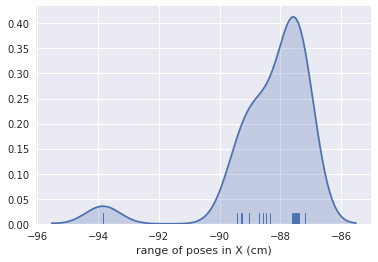

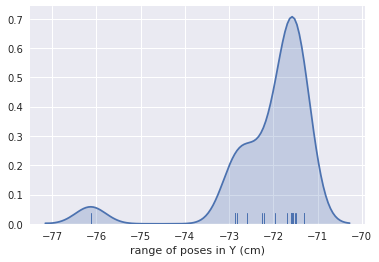

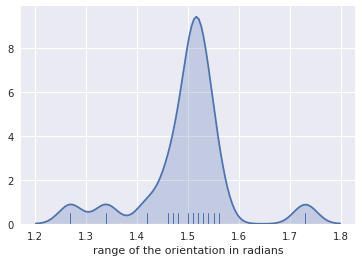

In [63]:
#plot with the outliers
print "Plots before the removal of outliers for the poses of the straight motion with object of medium mass"
#plt.title('plots before the removal of outliers for the poses of the straight motion with object of medium mass')
plot_xyo(x_m_str, y_m_str, o_m_str)

Plots after the removal of outliers for the poses of the straight motion with object of medium mass


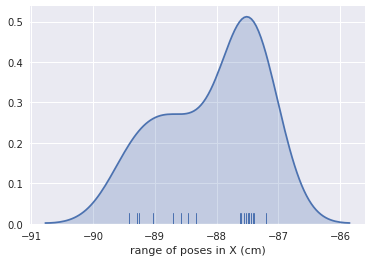

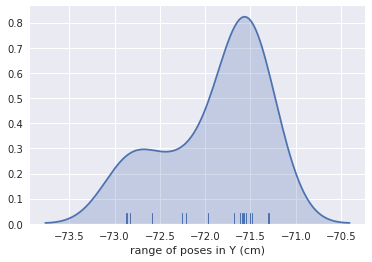

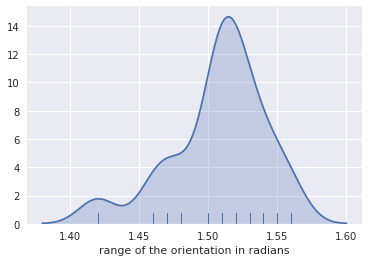

In [66]:
#plot with outlier removed
print "Plots after the removal of outliers for the poses of the straight motion with object of medium mass"
x_m_str_ = remove_outliers(x_m_str, 0.1, 0.05 )
y_m_str_ = remove_outliers(y_m_str, 0.1, 0.05 )
o_m_str_ = remove_outliers(o_m_str, 0.15, 0.2 )
#plt.title('plots after the removal of outliers for the poses of the straight motion with object of medium mass')
plot_xyo(x_m_str_, y_m_str_, o_m_str_)

Plots before the removal of outliers for the poses of the left motion with object of medium mass


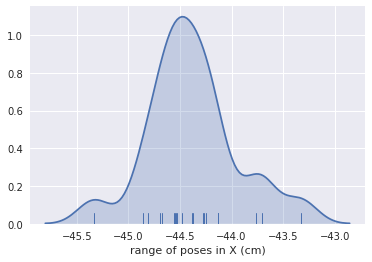

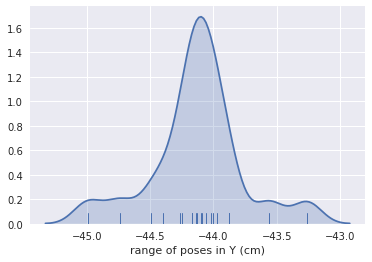

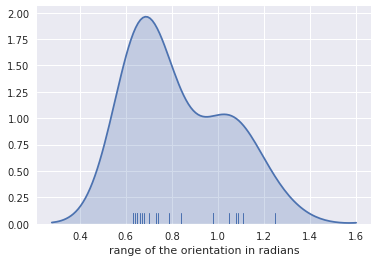

In [69]:
print "Plots before the removal of outliers for the poses of the left motion with object of medium mass"
#plt.title('plots before the removal of outliers for the poses of the left motion with object of medium mass')
plot_xyo(x_m_left, y_m_left, o_m_left)

Plots after the removal of outliers for the poses of the left motion with object of medium mass


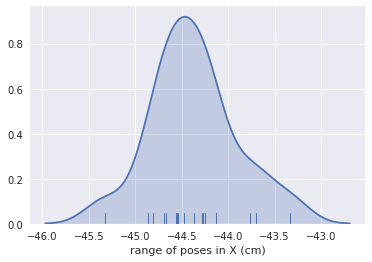

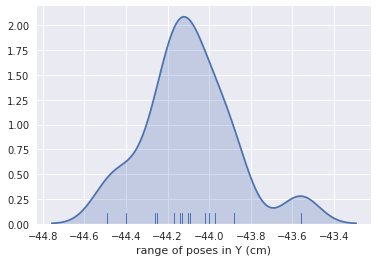

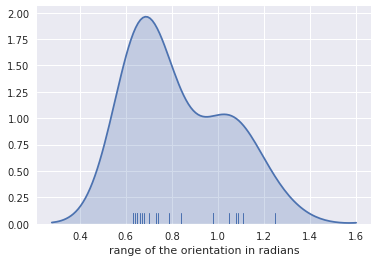

In [70]:
#plot with outlier removed
print "Plots after the removal of outliers for the poses of the left motion with object of medium mass"
x_m_left_ = remove_outliers(x_m_left, 0.15, 0.25 )
y_m_left_ = remove_outliers(y_m_left, 0.2, 0.2 )
o_m_left_ = remove_outliers(o_m_left, 0.1, 0.1 )
#plt.title('plots after the removal of outliers for the poses of the left motion with object of medium mass')
plot_xyo(x_m_left_, y_m_left_, o_m_left_)

Plots before the removal of outliers for the poses of the right motion with object of medium mass


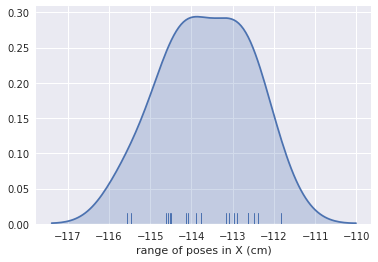

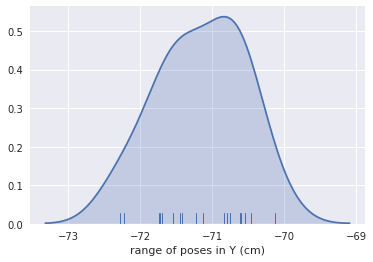

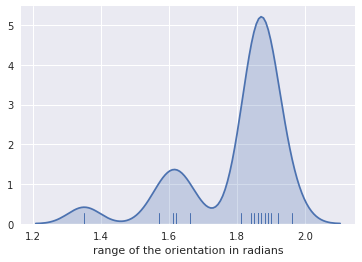

In [71]:
print "Plots before the removal of outliers for the poses of the right motion with object of medium mass"
#plt.title('plots before the removal of outliers for the poses of the right motion with object of medium mass')
plot_xyo(x_m_right, y_m_right, o_m_right)

Plots after the removal of outliers for the poses of the right motion with object of medium mass


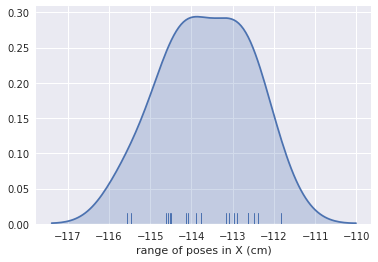

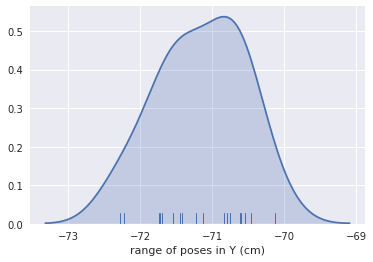

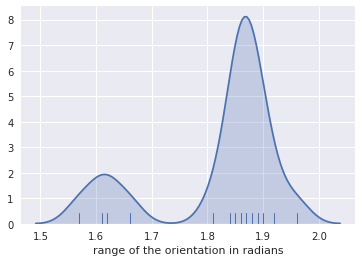

In [72]:
#plot with outlier removed
print "Plots after the removal of outliers for the poses of the right motion with object of medium mass"
x_m_right_ = remove_outliers(x_m_right, 0.1, 0.01 )
y_m_right_ = remove_outliers(y_m_right, 0.1, 0.01 )
o_m_right_ = remove_outliers(o_m_right, 0.1, 0.25 )
#plt.title('plots after the removal of outliers for the poses of the right motion with object of medium mass')
plot_xyo(x_m_right_, y_m_right_, o_m_right_)

plots before the removal of outliers for the poses of the straight motion with object of large mass


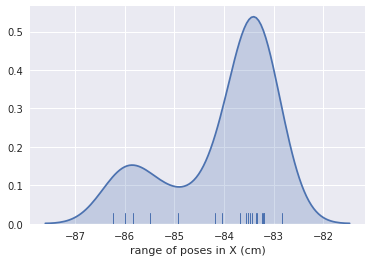

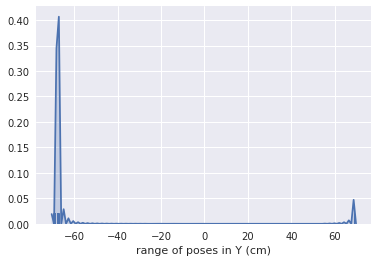

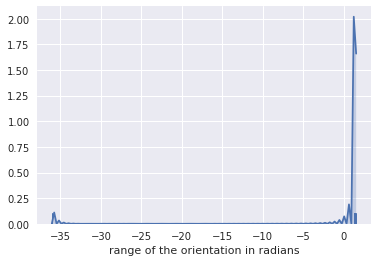

In [73]:
#plot with the outliers
print "Plots before the removal of outliers for the poses of the straight motion with object of large mass"
#plt.title('plots before the removal of outliers for the poses of the straight motion with object of large mass')
plot_xyo(x_l_str, y_l_str, o_l_str)

Plots after the removal of outliers for the poses of the straight motion with object of large mass


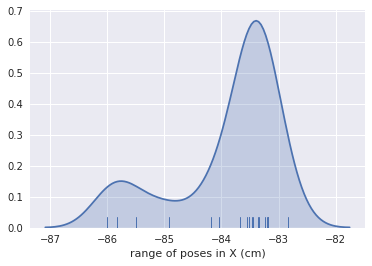

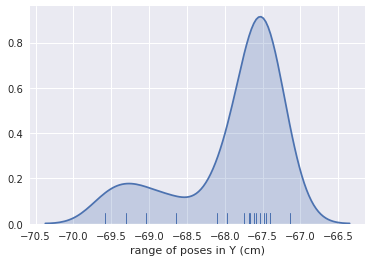

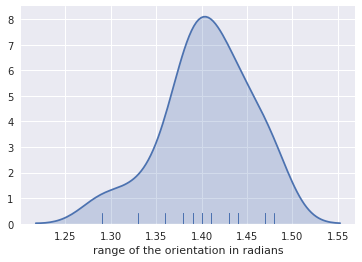

In [74]:
#plot with outlier removed
print "Plots after the removal of outliers for the poses of the straight motion with object of large mass"
x_l_str_ = remove_outliers(x_l_str, 0.05, 0.25 )
y_l_str_ = remove_outliers(y_l_str, 0.1, 0.01 )
o_l_str_ = remove_outliers(o_l_str, 0.1, 0.25 )
#plt.title('plots after the removal of outliers for the poses of the straight motion with object of large mass')
plot_xyo(x_l_str_, y_l_str_, o_l_str_)

Plots before the removal of outliers for the poses of the right motion with object of large mass


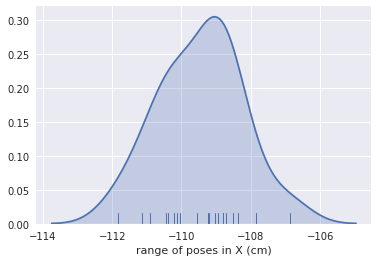

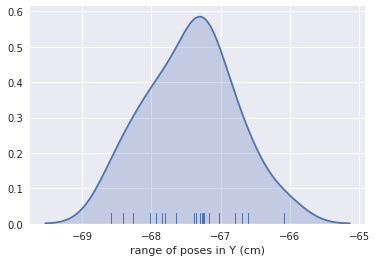

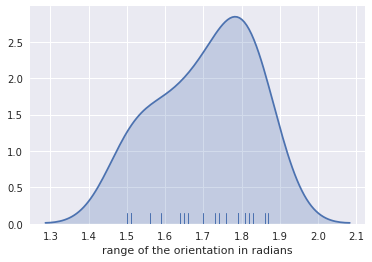

In [75]:
#plot with the outliers
print "Plots before the removal of outliers for the poses of the right motion with object of large mass"
#plt.title('plots before the removal of outliers for the poses of the right motion with object of large mass')
plot_xyo(x_l_right, y_l_right, o_l_right)

Plots after the removal of outliers for the poses of the straight motion with object of large mass


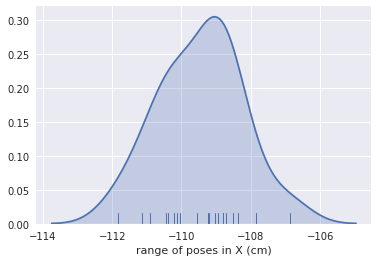

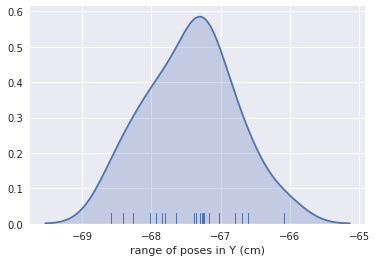

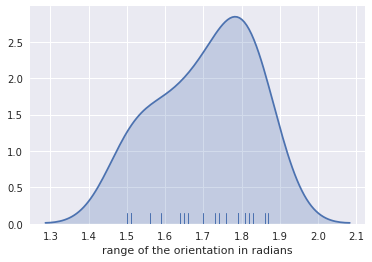

In [76]:
#plot with outlier removed
print "Plots after the removal of outliers for the poses of the straight motion with object of large mass"
x_l_right_ = remove_outliers(x_l_right, 0.1, 0.1 )
y_l_right_ = remove_outliers(y_l_right, 0.1, 0.01 )
o_l_right_ = remove_outliers(o_l_right, 0.1, 0.25 )
plot_xyo(x_l_right_, y_l_right_, o_l_right_)

Plots before the removal of outliers for the poses of the left motion with object of large mass


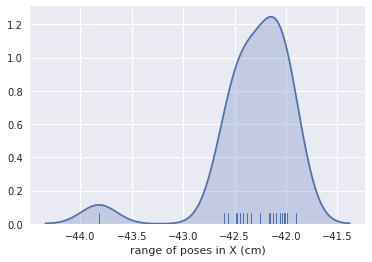

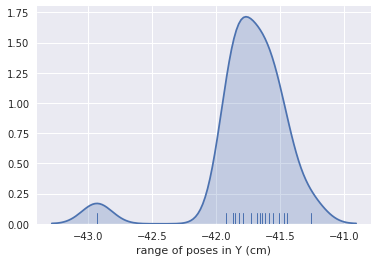

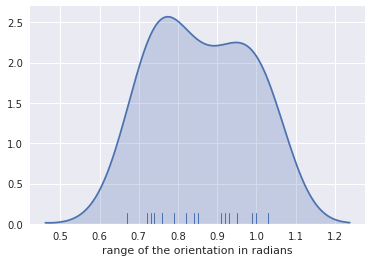

In [77]:
#plot with the outliers
print "Plots before the removal of outliers for the poses of the left motion with object of large mass"

plot_xyo(x_l_left, y_l_left, o_l_left)

Plots after the removal of outliers for the poses of the straight motion with object of large mass


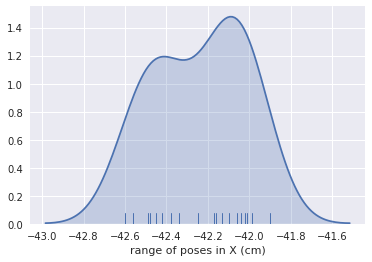

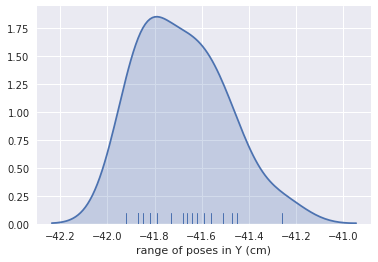

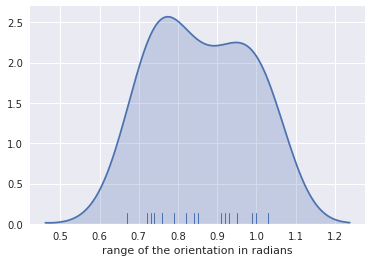

In [78]:
#plot with outlier removed
print "Plots after the removal of outliers for the poses of the straight motion with object of large mass"
x_l_left_ = remove_outliers(x_l_left, 0.1, 0.01 )
y_l_left_ = remove_outliers(y_l_left, 0.1, 0.01 )
o_l_left_ = remove_outliers(o_l_left, 0.1, 0.25 )
plot_xyo(x_l_left_, y_l_left_, o_l_left_)